# 1. 다변수 이산확률변수
## 1)결합확률 질량함수 Joint pmf
## $$P_{XY}(x, y)$$

## 50명학생 X,Y 과목에 대한 시험 결과

In [1]:
scores = np.array([[1, 2, 1, 0, 0, 0],
                   [0, 2, 3, 1, 0, 0],
                   [0, 4, 7, 4, 1, 0],
                   [0, 1, 4, 5, 4, 0],
                   [0, 0, 1, 3, 2, 0],
                   [0, 0, 0, 1, 2, 1]])
grades = list('ABCDEF')
pd.DataFrame(scores, columns=grades, index=grades)

,A,B,C,D,E,F
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [2]:
pmf = scores / scores.sum()
pd.DataFrame(pmf, columns=grades, index=grades)

,A,B,C,D,E,F
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


In [3]:
%matplotlib inline

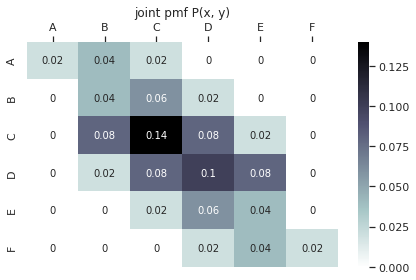

In [4]:
ax = sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True,
                 xticklabels=grades,
                 yticklabels=grades,)
ax.xaxis.tick_top()
plt.title('joint pmf P(x, y)')
plt.tight_layout()
plt.show()

### 1.1)Joint pdf section

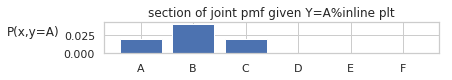

In [5]:
x = np.arange(6)
plt.subplot(6,1,1)
plt.bar(x, pmf[0, :])
plt.ylabel('P(x,y=A)', rotation=0, labelpad=30)
plt.xticks(range(6), grades)
plt.title("section of joint pmf given Y=A%inline plt")
plt.show()

## 2)주변 확률질량함수 Marginal pmf
### $$P_{X}(x) = \sum_{y_i} P_{XY}(x, y_i)$$

In [6]:
pmf_marginal_x = pmf.sum(axis=0)
print(pmf, pmf_marginal_x, sep='\n')

[[0.02 0.04 0.02 0.   0.   0.  ]
 [0.   0.04 0.06 0.02 0.   0.  ]
 [0.   0.08 0.14 0.08 0.02 0.  ]
 [0.   0.02 0.08 0.1  0.08 0.  ]
 [0.   0.   0.02 0.06 0.04 0.  ]
 [0.   0.   0.   0.02 0.04 0.02]]
[0.02 0.18 0.32 0.28 0.18 0.02]


In [7]:
pmf_marginal_y=pmf.sum(axis=1)
print(pmf, pmf_marginal_y.reshape(6,1), sep='\n')

[[0.02 0.04 0.02 0.   0.   0.  ]
 [0.   0.04 0.06 0.02 0.   0.  ]
 [0.   0.08 0.14 0.08 0.02 0.  ]
 [0.   0.02 0.08 0.1  0.08 0.  ]
 [0.   0.   0.02 0.06 0.04 0.  ]
 [0.   0.   0.   0.02 0.04 0.02]]
[[0.08]
 [0.12]
 [0.32]
 [0.28]
 [0.12]
 [0.08]]


## 3)조건부 확률질량함수 Conditional pmf
### $$P_{X \mid Y}(x \mid y) = \dfrac{P_{XY}(x, y)}{P_{Y}(y)}$$

### y = A 결합확률 질량함수 Joint pmf의 단면

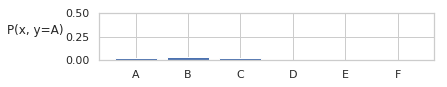

[0.02 0.04 0.02 0.   0.   0.  ] sum:  0.08


In [13]:
x=np.arange(6)
plt.subplot(411)
plt.bar(x, pmf[0, :], data=pmf[0, :])
plt.ylim(0, 0.5)
plt.ylabel("P(x, y=A)", rotation=0, labelpad=30)
plt.xticks(range(6), list('ABCDEF'))
plt.show()
print(pmf[0, :], 'sum: ', pmf[0, :].sum())

### y=A 조건부 확률질량함수 conditional pmf

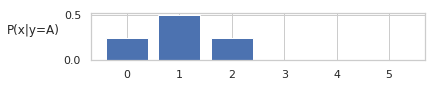

[0.25 0.5  0.25 0.   0.   0.  ] sum:  1.0


In [15]:
cond_y0 = pmf[0, :]/pmf.sum(axis=1)[0]
plt.subplot(411)
plt.bar(np.arange(6), cond_y0)
plt.ylabel('P(x|y=A)', rotation=0, labelpad=30)
plt.show()
print(cond_y0, 'sum: ', cond_y0.sum())

# 2. 다변수 연속확률변수

<img src = "files/MultivariateNorm.png">from wiki

## 1)결합 누적확률분포 Joint cdf
### $$F_{XY}(x, y) = P(\{ X < x, Y < y\})$$

## 2)주변 누적확률분포 Marginal cdf
### $$F_{X}(x) = F_{XY}(x, \infty)$$

## 3)결합 확률밀도함수 Joint pdf
- Joint cdf 미분 두 번
### $$f_{XY} = \dfrac{\partial^2 F_{XY}(x, y)}{\partial x \partial y}$$

In [5]:
%matplotlib inline

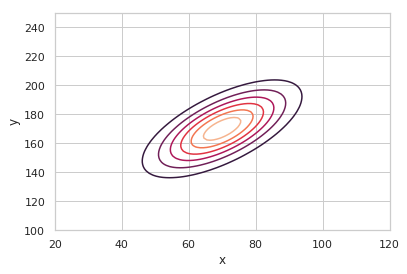

In [64]:
mu = [70, 170]
cov = [[150, 140], [140, 300]]

# 다변수 가우시안 정규분포
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.xlabel('x')
plt.ylabel('y')
plt.contour(XX, YY, ZZ)
plt.show()

### Y=y일 때 단면

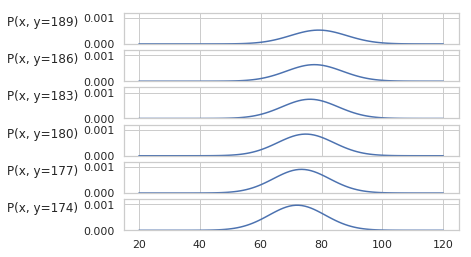

In [109]:
for i, j in enumerate(range(59, 47, -2)):
    ax = plt.subplot(6, 1, i + 1)
    plt.plot(xx, ZZ[j, :])
    plt.ylim(0, 0.0012)
    if i < 5:
        ax.xaxis.set_ticklabels([])
    plt.ylabel("P(x, y={:.0f})".format(yy[j]), \
    rotation=0, labelpad=40)
plt.tight_layout
plt.show()

## 4)주변 확률밀도함수 Marginal pdf
- Joint pdf에서 적분 한 번
- 적분하여 더한다
### $$f_X(x) = \int_{-\infty}^{\infty} f_{XY}(x, y)dy$$

## 5)조건부 확률밀도함수 Conditional pdf
### $$f_{X \mid Y}(x \mid y) = \dfrac{f_{XY}(x, y)}{f_{Y}(y)}$$

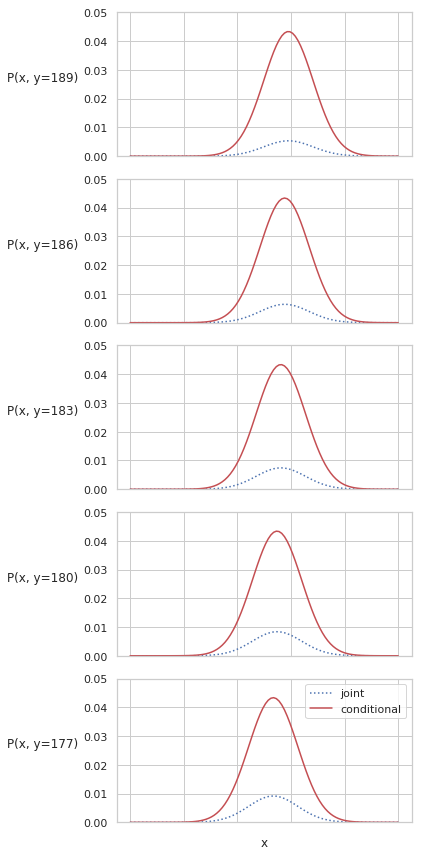

In [117]:
from scipy.integrate import simps

mag = 10

plt.figure(figsize=(6,12))

for i, j in enumerate(range(59, 49, -2)):
    ax = plt.subplot(5, 1, i + 1)
    plt.plot(xx, ZZ[j, :] * mag, 'b:', label='joint')
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal, 'r-', label='conditional')
    plt.ylim(0, 0.05)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("P(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)

plt.xlabel("x")
plt.tight_layout()
plt.legend()
plt.show()

### cf. meshgrid: make grid point

In [18]:
x = np.arange(3)
y = np.arange(5)
x, y

(array([0, 1, 2]), array([0, 1, 2, 3, 4]))

In [19]:
X, Y = np.meshgrid(x, y)

In [22]:
X

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [23]:
Y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [35]:
list(zip(X,Y))

[(array([0, 1, 2]), array([0, 0, 0])),
 (array([0, 1, 2]), array([1, 1, 1])),
 (array([0, 1, 2]), array([2, 2, 2])),
 (array([0, 1, 2]), array([3, 3, 3])),
 (array([0, 1, 2]), array([4, 4, 4]))]

In [36]:
[list(zip(x, y)) for x, y in zip(X, Y)]


[[(0, 0), (1, 0), (2, 0)],
 [(0, 1), (1, 1), (2, 1)],
 [(0, 2), (1, 2), (2, 2)],
 [(0, 3), (1, 3), (2, 3)],
 [(0, 4), (1, 4), (2, 4)]]

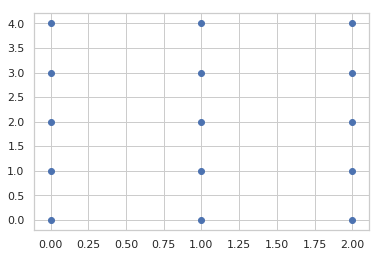

In [32]:
plt.scatter(X, Y)